<a href="https://colab.research.google.com/github/Priy-Sharma/Product-Recommendation-System/blob/main/product_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
amazon_data = '/content/drive/MyDrive/Recommendation_system/product recommendation/amazon.csv'

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv(amazon_data)

In [5]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [6]:
df.shape

(1465, 16)

# Data Preprocessing

In [7]:
# Check null values
df.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [8]:
# Drop null values
df.dropna(inplace = True)

In [9]:
# Check duplicated values
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1463 non-null   object
 1   product_name         1463 non-null   object
 2   category             1463 non-null   object
 3   discounted_price     1463 non-null   object
 4   actual_price         1463 non-null   object
 5   discount_percentage  1463 non-null   object
 6   rating               1463 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1463 non-null   object
 9   user_id              1463 non-null   object
 10  user_name            1463 non-null   object
 11  review_id            1463 non-null   object
 12  review_title         1463 non-null   object
 13  review_content       1463 non-null   object
 14  img_link             1463 non-null   object
 15  product_link         1463 non-null   object
dtypes: object(1

To resolve the issue with the data types of the columns 'actual_price', 'discounted_price', 'discount_percentage', 'rating', and 'rating_count', we will perform the following steps:
<ul>
 <li>Remove the rupee symbol from the 'actual_price' and 'discounted_price' columns. </li>
<li>Remove the % symbol from the 'discount_percentage' column. </li>
<li>Identify the records in the 'rating' column that are causing the incorrect data type.</li>
<li>Remove the punctuation (,) from the 'rating_count' column</li>
</ul>

In [11]:
df['actual_price'] = df['actual_price'].astype(str).apply(lambda x: x.replace('₹', '').replace(',', '')).astype("float")
df['discounted_price'] = df['discounted_price'].astype(str).apply(lambda x: x.replace('₹', '').replace(',', '')).astype("float")
df['discount_percentage'] = df['discount_percentage'].astype(str).apply(lambda x: x.replace("%", "")).astype(int)

In [12]:
def is_float(num):
  try:
    float(num)
  except:
    return False
  return True

In [13]:
df[~df['rating'].apply(is_float)]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,16,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In [14]:
# The index 1279 contains the symbol '|' in rating column. We will drop this particular index and convert column to float
df.drop(1279, inplace = True)
df['rating'] = df['rating'].astype("float")

In [15]:
df['rating_count'] = df['rating_count'].astype("str").apply(lambda x: x.replace(",", "")).astype("int")


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1462 non-null   object 
 1   product_name         1462 non-null   object 
 2   category             1462 non-null   object 
 3   discounted_price     1462 non-null   float64
 4   actual_price         1462 non-null   float64
 5   discount_percentage  1462 non-null   int64  
 6   rating               1462 non-null   float64
 7   rating_count         1462 non-null   int64  
 8   about_product        1462 non-null   object 
 9   user_id              1462 non-null   object 
 10  user_name            1462 non-null   object 
 11  review_id            1462 non-null   object 
 12  review_title         1462 non-null   object 
 13  review_content       1462 non-null   object 
 14  img_link             1462 non-null   object 
 15  product_link         1462 non-null   object

In [17]:
# Shape of dataframe after preprocessing.
df.shape

(1462, 16)

# Exploratory Data Analysis

In [18]:
df_eda = df.copy()

In [19]:
unique_products_count = df_eda['product_id'].nunique()
average_price = df_eda['actual_price'].mean()
best_selling_product = df_eda.loc[df_eda['rating_count'].idxmax()]
least_selling_product = df_eda.loc[df_eda['rating_count'].idxmin()]
top_rated_product = df_eda.loc[df_eda['rating'].idxmax()]
lowest_rated_product = df_eda.loc[df_eda['rating'].idxmin()]
most_expensive_product = df_eda.loc[df_eda['actual_price'].idxmax()]
cheapest_product = df_eda.loc[df_eda['actual_price'].idxmin()]
highest_discount_product = df_eda.loc[df_eda['discount_percentage'].idxmax()]
avg_rating_count = df_eda.groupby('product_id')['rating_count'].mean().mean()

df_ans = pd.DataFrame({
    'Question': [
        'Number of Unique Products',
        'Average Price',
        'Best-selling Product',
        'Least-selling Product',
        'Top-rated Product',
        'Lowest-rated Product',
        'Most Expensive Product',
        'Cheapest Product',
        'Highest Discount Product',
        'Average Rating Count for Each Product'
    ],
    'Answer': [
        unique_products_count,
        average_price,
        best_selling_product['product_name'],
        least_selling_product['product_name'],
        top_rated_product['product_name'],
        lowest_rated_product['product_name'],
        most_expensive_product['product_name'],
        cheapest_product['product_name'],
        highest_discount_product['product_name'],
        avg_rating_count
    ],
    'Actual Price': [
        None,
        None,
        best_selling_product['actual_price'],
        least_selling_product['actual_price'],
        top_rated_product['actual_price'],
        lowest_rated_product['actual_price'],
        most_expensive_product['actual_price'],
        cheapest_product['actual_price'],
        highest_discount_product['actual_price'],
        None
    ]
})

df_ans

,Question,Answer,Actual Price
0,Number of Unique Products,1348,NaN
1,Average Price,5453.087743,NaN
2,Best-selling Product,AmazonBasics Flexible Premium HDMI Cable (Blac...,700.0
3,Least-selling Product,Khaitan ORFin Fan heater for Home and kitchen-...,2495.0
4,Top-rated Product,Syncwire LTG to USB Cable for Fast Charging Co...,1999.0
5,Lowest-rated Product,Khaitan ORFin Fan heater for Home and kitchen-...,2495.0
6,Most Expensive Product,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,139900.0
7,Cheapest Product,E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...,39.0
8,Highest Discount Product,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...",4999.0
9,Average Rating Count for Each Product,17656.855341,NaN


In [20]:
df['category'][0]

'Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables'

Explaination of the string "Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables" is:
<ol>
<li>Computers & Accessories: The big umbrella category for everything related to computers, including the computers themselves and the extras that go with them. </li>
<li>Accessories & Peripherals: A subcategory within Computers & Accessories that focuses on the additional things you can connect to your computer, like keyboards, mice, printers, and cables.</li>
<li>Cables: An even more specific category under Accessories & Peripherals, just for cables.</li>
<li>USB Cables: A type of cable specifically designed for the USB connector.</li>
</ol>

## Sales Distribution By category

In [21]:
# Extraction of main category from the category column.
df_eda['main_category'] = df_eda['category'].apply(lambda x: x.split("|")[0])
category_sales = df_eda.groupby("main_category")['discounted_price'].sum().reset_index()

In [22]:
import plotly.express as px
pie_fig = px.pie(category_sales, values = 'discounted_price', names= "main_category", labels = 'main_category', color_discrete_sequence=px.colors.sequential.RdBu,
                 title = "Sales Distibution by category")
pie_fig.update_traces( textposition='inside')

<b> Observations:</b>

The pie chart shows that the "Electronics" category accounts for the largest share 68.6 % with discounted sales. Followed by the 'Home&Kitchen" category with 22.8%. Categories like "office_products", "car_motorbike", "Musical_instruments", "Health&personalcare", "HomrImprovement", "Toys&games" have combine share of only 0.27%.

<b>Insight:</b>

The dominance of "Electronics" suggests that discounted offerings in this category are particularly effective at driving sales.

## Top 10 Popular subcategories

In [23]:
df_eda['subcategory'] = df_eda['category'].apply(lambda x: x.split("|")[1])
subcategory_pop = df_eda.groupby("subcategory")['rating_count'].mean().reset_index()
subcategory_pop = subcategory_pop.sort_values("rating_count", ascending =False)

<Axes: xlabel='rating_count', ylabel='subcategory'>

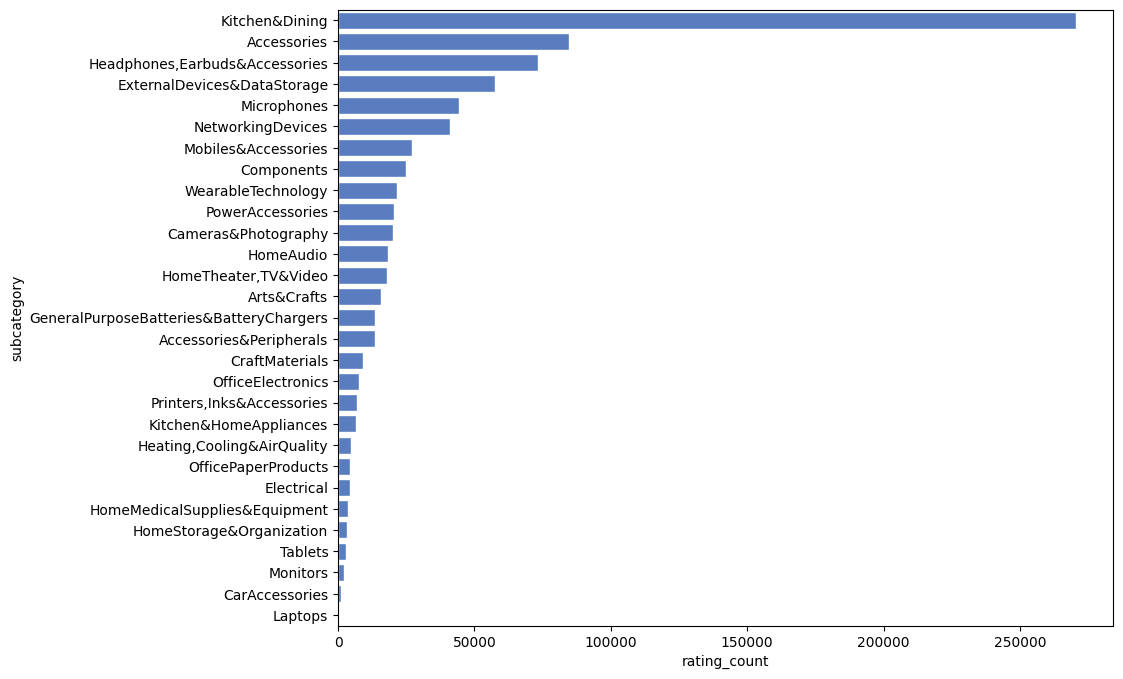

In [24]:
f, ax = plt.subplots(figsize=(10,8))
sns.set_theme(style="whitegrid")
sns.set_color_codes("muted")
sns.barplot(x="rating_count", y="subcategory", data=subcategory_pop, color="b")

<b> Observations:</b>

<ul>
<li>High rating counts often indicate popular subcategories with a high volume of sales.</li>
<li>While the "electronics" category generates the most sales overall, the most popular product (based on sales) actually belongs to the "Kitchen & Dining" subcategory within the "Home & Kitchen" category.</li>
<li>Interestingly, the "laptops" subcategory has the least number of individual products sold, yet it remains the third-largest contributor to total sales.</li>
</ul>

<b> Insights:</b>
<ul>
<li>The "Kitchen & Dining" subcategory likely has a lower average price point compared to other categories, making it more accessible and driving higher sales volume. This segment caters to everyday needs, encouraging frequent purchases.</li>
<li>Computers, especially laptops, likely have a higher average selling price, resulting in fewer individual units sold. However, their higher price tags contribute significantly to the overall sales for the category.</li>
</ul>


# Price comparison

In [25]:
discount_price = df_eda.groupby("subcategory").agg({'actual_price': np.mean, 'discount_percentage': np.mean}).reset_index()

In [26]:
discount_price_10 = discount_price.sort_values(by = 'actual_price', ascending = False)[:10]

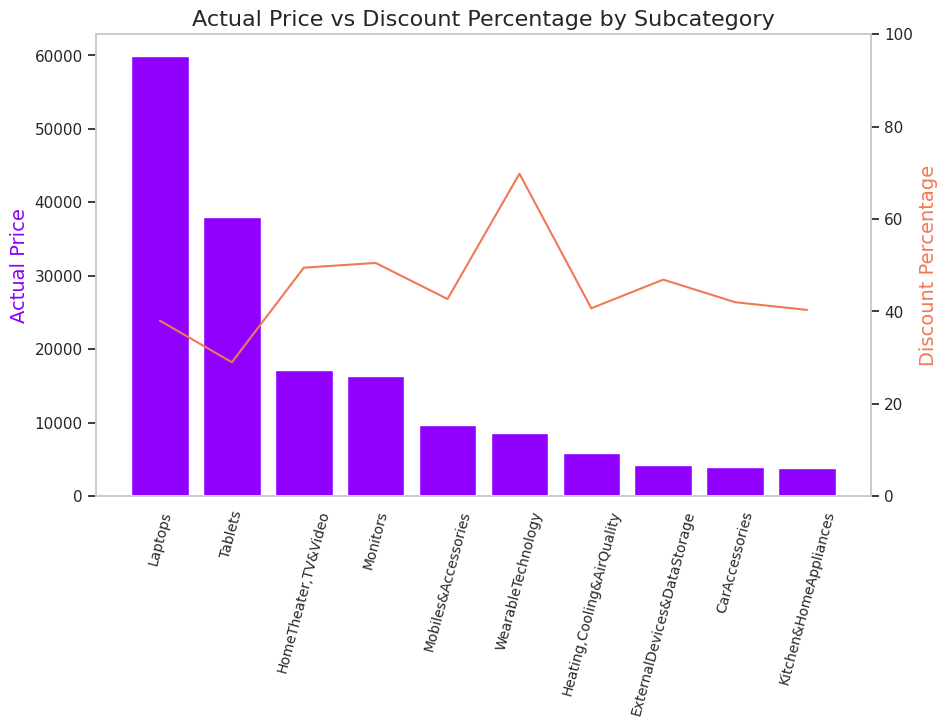

In [27]:
plt.figure(figsize=(10, 6))

ax1 = plt.gca()
ax2 = ax1.twinx()

# Set y-axis labels with colors
ax1.set_ylabel("Actual Price", fontsize=14, color='#8F00FF')
ax2.set_ylabel("Discount Percentage", fontsize=14, color='#F07857')

# Plot the data
ax1.bar(discount_price_10['subcategory'], discount_price_10['actual_price'], color='#8F00FF', label='Actual Price')
ax2.plot(discount_price_10['subcategory'], discount_price_10['discount_percentage'], color='#F07857', label='Discount Percentage')

# Set x-axis limit
ax2.set_ylim(0, 100)

# Rotate x-tick labels
ax1.set_xticklabels(discount_price_10['subcategory'], rotation=75, fontsize=10)

# Remove gridlines
ax1.grid(False)
ax2.grid(False)

# Add title
plt.title("Actual Price vs Discount Percentage by Subcategory", fontsize=16)
plt.show()



<b> Observations: </b>
<li> Laptops have the highest prices among the subcategories, but discounts on wearable technology are the deepest, exceeding 60%. </li>
<li>Kitchen and appliances tend to have the lowest price points. </li>
<li> Discounts on tablets are generally lower compared to other categories.</li>

<b> Insight:</b>
The higher manufacturing and marketing costs associated with laptops and tablets likely lead to smaller discount margins for these products.

# Distribution of Discount Percentage

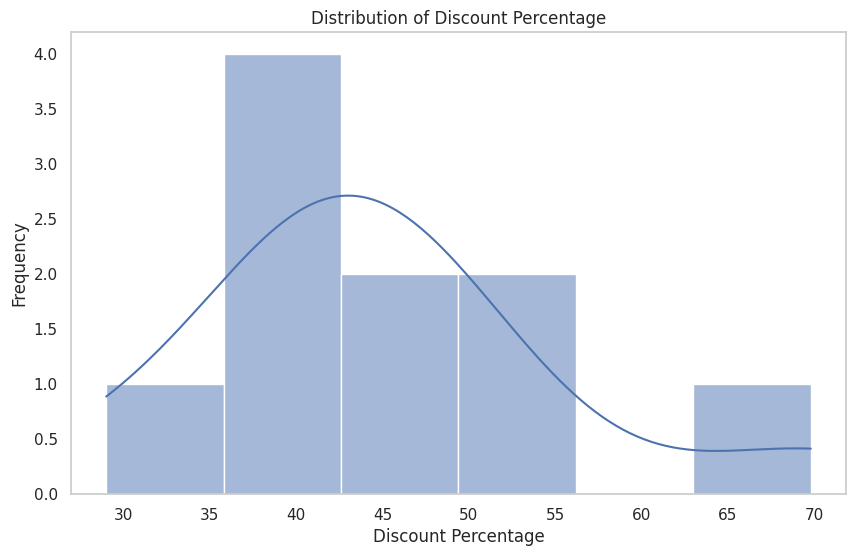

In [28]:
plt.figure(figsize=(10, 6))
plt.title('Distribution of Discount Percentage')
fig1 = sns.histplot(data=discount_price_10, x='discount_percentage', kde=True)
fig1.grid(False)
fig1.set_xlabel('Discount Percentage')
fig1.set_ylabel('Frequency')
plt.show()


<b> Observations: </b>

<ul>
<li>Discounts between 35% and 45% are the most common across all product categories.</li>
<li>Interestingly, there seems to be a gap in discounts between 55% and 60% - no products fall within this specific range.</li>
</ul>

<b> Insights:</b>
<ul>
<li>The discount in the 35-45% range suggests that retailers might have established this as a sweet spot for balancing profitability and customer incentive. It's likely effective in driving sales without significantly impacting margins.</li>
</ul>

# Customer Insight

In [29]:
# Top 10 users by number of review
review_count_df = df_eda.groupby("user_id")['review_id'].count().sort_values(ascending=False).reset_index(name='review_count').head(10)
review_count_df

,user_id,review_count
0,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...",10
1,"AGAELRYPMTG5SADZPDYB343EASAA,AGFN4JODOM2NTFCJQ...",8
2,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",8
3,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",7
4,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",7
5,"AG44HJB2AMIVHAGQZ2WGWONERKCA,AHL2FABQV6XAHZN54...",6
6,"AHWRZWPCTG6ICA7WTNLNNZXWFI5Q,AF2AASVYVSROFD7FX...",6
7,"AF2IRSQZKMBGX44YDNUPYRHWXOZQ,AF6VSSXOI3Y4PZCNR...",5
8,"AHEVOQADJSSRX7DS325HSFLMP7VQ,AG7XYZRCSKX6G2OLO...",5
9,"AF477BP57JM7Z4JD4PYB2K33R6AQ,AGTDD34Y77OB36JNY...",5


In [30]:
fig = px.bar(review_count_df, x=review_count_df.index, y='review_count', title = 'Top 10 users by number of review',
             hover_data=[review_count_df['user_id']], color = 'review_count', height=400, color_continuous_scale='matter')
fig.update_layout(coloraxis_showscale = False)
fig.show()

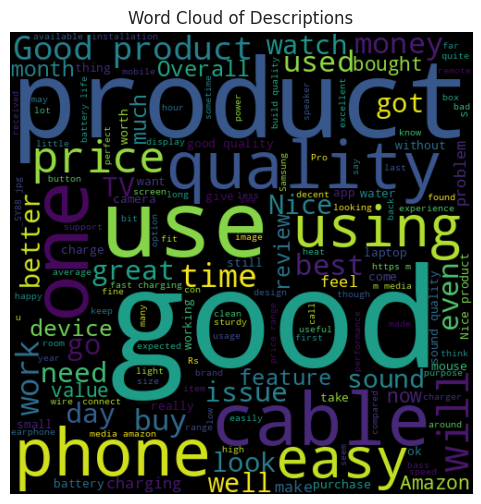

In [31]:
from wordcloud import WordCloud
text = ' '.join(df_eda['review_content'].dropna())

wc = WordCloud(width=500, height=500, min_font_size=10, background_color='black')
spam_wc = wc.generate(text)

plt.figure(figsize=(15, 6))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud of Descriptions')
plt.show()

# Exploring Discounted Price Ranges by Category

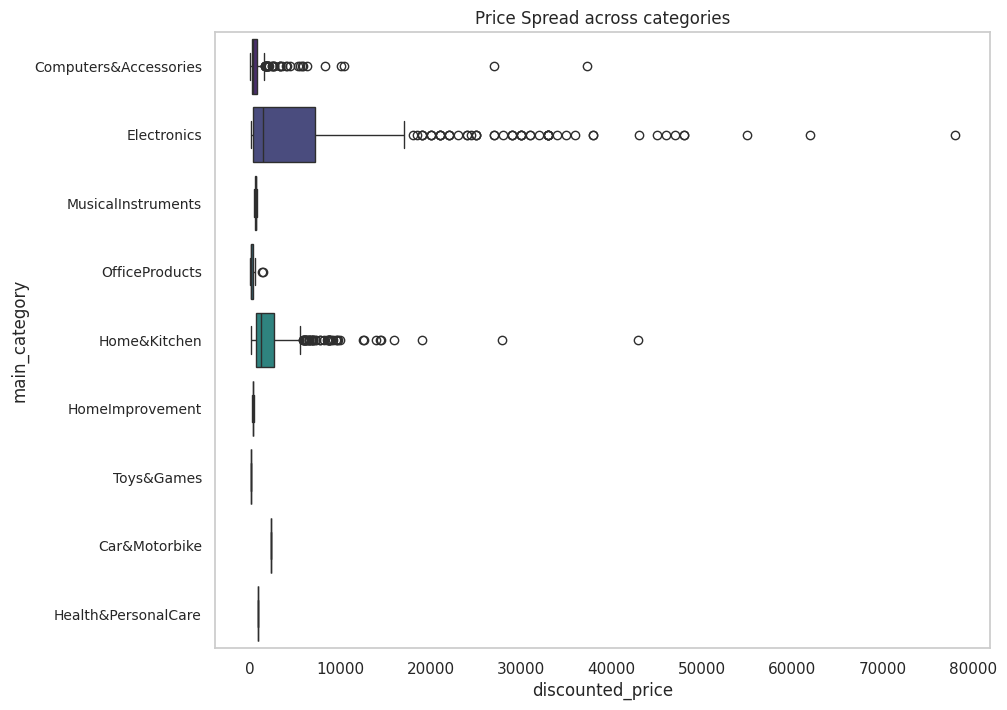

In [32]:
plt.figure(figsize=(10, 8))
plt.title("Price Spread across categories")
sns.set(style="whitegrid")
box_plot = sns.boxplot(data=df_eda, y='main_category', x='discounted_price', palette='viridis')
box_plot.set_yticklabels(box_plot.get_yticklabels(), fontsize=10)
box_plot.grid(False)
plt.show()

<b>observations: </b>
<ul>
<li>Discounts for electronics and home & kitchen products show a wider range compared to other categories.</li>
</ul>

<b> Insights:</b>
<ul>
<li>This wider range of discounts is likely due to several factors:
<ul>
<li>Multiple brands: Both electronics and home & kitchen categories typically have a large variety of brands competing for market share.</li>
<li>Catering to diverse budgets: These categories cater to a wide range of customer budgets.</li>
<li>Product lifespans:  Electronics often have shorter lifespans compared to some home & kitchen items.</li>
</ul>
</li>
</ul>

# Popularity based recommendation system

In [33]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

## <b> Short overview on steps which we are going to follow: </b>
<ol>
<li> Select the neccessary columns to make the popularity based recommendation system from original data</li>
<li> Extract the category upto two level of hierachy and then converting to lower case. </li>


<li>Calculating the weighted average by the modified formula:
            <pre>
                df_popular['weighted_average'] = (df['rating'] * df['rating_count']) / df['rating_count']) * (df['rating_count']/1000)
            </pre>
            In the weighted average formula, I add the multiplication term (df['rating_count']/1000)
        </li>
        <li>Consider the example that the first product got 4 ratings and 220 rating_counts. The second product got 4 ratings and 450 rating_counts.
            <br><br>
            If I use the formula:
            <pre>
                df_popular['weighted_average'] = (df['rating'] * df['rating_count']) / df['rating_count']
            </pre>
            Then the weighted average for both products using the above formula will be 4. But I want to give more weight to the second product because its rating count is maximum. Therefore, I will use the formula:
            <pre>
                df_popular['weighted_average'] = (df['rating'] * df['rating_count']) / df['rating_count'] * (df['rating_count']/1000)
            </pre>
            By the above formula, the weighted average for the first product will be 0.88 and for the second product will be 1.8, so more weight will go to the second product.
        </li>

  <li>Create a DataFrame named `sorted_df` with the following column names: "product_name", "category", "weighted_average".</li>
  <li>Develop a function named `popular_recommendation`. This function will take an input parameter (e.g., 'airquality') and search within the "category" column of `sorted_df`. It will then return the top 5 products from that specific category based on their `weighted_average` values.</li>
  </ol>

In [34]:
# Select the columns useful for popularity based recommendation system
df_popular = df[['product_id', 'product_name', 'category', 'rating', 'rating_count']]

In [35]:
df_popular['category'] = df_popular['category'].apply(lambda x: " ".join(x.split("|")[0:2]))
df_popular['category'] = df_popular['category'].str.lower()

In [36]:
df_popular['weighted_average'] = round(((df['rating'] * df['rating_count']) / df['rating_count'])* (df['rating_count']/1000), 3)

In [37]:
df_popular.groupby("category")
sorted_df = df_popular.sort_values(by = 'weighted_average', ascending = False)
sorted_df = sorted_df.reset_index()
sorted_df = sorted_df[['product_name', 'category', 'weighted_average']]

In [38]:
sorted_df

,product_name,category,weighted_average
0,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...","electronics hometheater,tv&video",1878.681
1,AmazonBasics Flexible Premium HDMI Cable (Blac...,"electronics hometheater,tv&video",1878.681
2,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...","electronics hometheater,tv&video",1878.681
3,AmazonBasics Flexible Premium HDMI Cable (Blac...,"electronics hometheater,tv&video",1878.677
4,boAt Bassheads 100 in Ear Wired Earphones with...,"electronics headphones,earbuds&accessories",1491.223
...,...,...,...
1457,"Longway Blaze 2 Rod Quartz Room Heater (White,...","home&kitchen heating,cooling&airquality",0.015
1458,Lifelong LLQH925 Dyno Quartz Heater 2 Power se...,"home&kitchen heating,cooling&airquality",0.015
1459,VAPJA® Portable Mini Juicer Cup Blender USB Re...,home&kitchen kitchen&homeappliances,0.014
1460,NGI Store 2 Pieces Pet Hair Removers for Your ...,home&kitchen kitchen&homeappliances,0.006


In [39]:
def popular_recommendation(text):
    mask = sorted_df['category'].str.split()

    product_list = []
    for i in range(len(mask)):
        if text in mask[i]:
            product_list.append(sorted_df.iloc[i]['product_name'])
    return product_list

    return "No product found with the specified category."

In [40]:
# product = popular_recommendation("electronics")
product = popular_recommendation("home&kitchen")
for i in product[0:5]:
  print(i)


Pigeon Polypropylene Mini Handy and Compact Chopper with 3 Blades for Effortlessly Chopping Vegetables and Fruits for Your Kitchen (12420, Green, 400 ml)
Pigeon by Stovekraft Amaze Plus Electric Kettle (14289) with Stainless Steel Body, 1.5 litre, used for boiling Water, making tea and coffee, instant noodles, soup etc. 1500 Watt (Silver)
Swiffer Instant Electric Water Heater Faucet Tap Home-Kitchen Instantaneous Water Heater Tank less for Tap, LED Electric Head Water Heaters Tail Gallon Comfort(3000W) ((Pack of 1))
Prestige Electric Kettle PKOSS - 1500watts, Steel (1.5Ltr), Black
Pigeon by Stovekraft Cruise 1800 watt Induction Cooktop (Black)


# Content Based Recommendation System

## Short overview on steps which we are going to follow:

<ol>
        <li>Select the necessary columns from the original data to make a content-based recommendation system.</li>
        <li>Filter the rows to include only those with a rating greater than 4.1.</li>
        <li>Create a new column 'product_search_name' by extracting the last subcategory from the 'category' column and converting it to lowercase.</li>
        <li>Create a new column 'category' by extracting the first two subcategories from the 'category' column and converting it to lowercase.</li>
        <li>Create a new column 'description' by merging the columns 'category', 'about_product', 'review_content', and 'product_name'.</li>
        <li>Drop the unnecessary columns.</li>
        <li>Convert the 'description' column to lowercase.</li>
        <li>Apply the PorterStemmer class to the 'description' column.</li>
        <li>Define a TF-IDF Vectorizer object with stop_word hyperparameter as true to the 'description' column.</li>
        <li>Calculate the cosine similarities between the vectors for all indexes.</li>
        <li>Develop a `recommend` function.
        <p>for example
        if I search by the product search name 'wirelessusbadapters', the function will return all product names similar to the search term. </p>
        </li>
    </ol>





In [41]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [42]:
df_content = df[[ 'product_name','category', 'about_product', 'product_id', 'review_content', 'rating']]

In [44]:
df_content['product_search_name'] = df_content['category'].apply(lambda x:(x.split("|")[-1]))
df_content['category'] = df_content['category'].apply(lambda x: " ".join(x.split("|")[0:2]))

In [45]:
print(f"Original string present in the category column is:\n {df['category'][0]}")
print("-" *20)
print(f" The extracted category is:\n {df_content['category'][0]}")
print("-" *20)
print(f"The extracted product search name is:\n {df_content['product_search_name'][0]}")

Original string present in the category column is:
 Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables
--------------------
 The extracted category is:
 Computers&Accessories Accessories&Peripherals
--------------------
The extracted product search name is:
 USBCables


In [46]:
df_content['product_search_name'] = df_content['product_search_name'].str.lower()

In [47]:
df_content['description'] = df_content['category'] + df_content['about_product'] + df_content['review_content'] + df_content['product_name']

In [48]:
df_content.drop(columns = ['category', 'about_product', 'review_content', 'rating'], inplace = True)
df_content = df_content.reset_index()
df_content.drop('index', axis =1, inplace = True)

In [49]:
df_content.head(2)

,product_name,product_id,product_search_name,description
0,Wayona Nylon Braided USB to Lightning Fast Cha...,B07JW9H4J1,usbcables,Computers&Accessories Accessories&PeripheralsH...
1,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,B08HDJ86NZ,usbcables,Computers&Accessories Accessories&PeripheralsT...


In [50]:
df_content['description'][2]

"Computers&Accessories Accessories&Peripherals[CHARGE & SYNC FUNCTION]- This cable comes with charging & Data sync function|[HIGH QUALITY MATERIAL]- TPE + Nylon Material to make sure that the life of the cable is enhanced significantly|[LONG CORD]- The Cable is extra thick 1.2 meter long, optimized for an easy use for your comfort at home or office|[MORE DURABLE]-This cable is unique interms of design and multi-use and is positioned to provide the best comfort and performance while using|[UNIVERSAL COMPATIBILITY]- Compatible with all devices like iPhone XS, X, XR, 8, 7, 6S, 6, 5S, iPad Pro, iPad mini and iPad AirBought this instead of original apple, does the work for 150rs, not as fast as apple charger but its a good option if you want cheap and good product, bought it for iPad pro 10.5 and it's working flawlessly, build quality is ok, its not like i am gonna hang my clothes on it and i want a very strong cable, even a braided cable stop working after a year, i have used both Anker an

In [51]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
nltk.download("punkt")
nltk.download("stopwords")
from sklearn.feature_extraction.text import TfidfVectorizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [52]:
# Covert to lower case
df_content['description'] = df_content['description'].str.lower()


In [53]:
ps = PorterStemmer()
def stem(text):
  y = []
  for i in text.split():
    y.append(ps.stem(i))

  return " ".join(y)

In [54]:
df_content['description'] = df_content['description'].apply(stem)

In [55]:
#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

df_content['description'] = df_content['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df_content['description']).toarray()

In [56]:
#Output the shape of tfidf_matrix
tfidf_matrix.shape

(684, 12616)

In [57]:
tfidf_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [58]:
from sklearn.metrics.pairwise import cosine_similarity

In [59]:
similarity = cosine_similarity(tfidf_matrix)

In [60]:
similarity

array([[1.        , 0.15915556, 0.31643091, ..., 0.04536122, 0.02712955,
        0.00952401],
       [0.15915556, 1.        , 0.238079  , ..., 0.04884467, 0.04349145,
        0.02170092],
       [0.31643091, 0.238079  , 1.        , ..., 0.07498482, 0.06221371,
        0.03161269],
       ...,
       [0.04536122, 0.04884467, 0.07498482, ..., 1.        , 0.0850872 ,
        0.06580553],
       [0.02712955, 0.04349145, 0.06221371, ..., 0.0850872 , 1.        ,
        0.04152086],
       [0.00952401, 0.02170092, 0.03161269, ..., 0.06580553, 0.04152086,
        1.        ]])

In [61]:
sorted(list(enumerate(similarity[0])), reverse = True, key = lambda x: x[1])[:5]

[(0, 1.0),
 (295, 0.9945317248685909),
 (200, 0.9943742841763884),
 (122, 0.9364690667922134),
 (27, 0.9254422709934126)]

In [62]:
def recommend(name):
  product_index = df_content[df_content['product_search_name'] == name].index[0]
  distances = similarity[product_index]
  product_list = sorted(list(enumerate(distances)), reverse = True, key = lambda x: x[1])[1:6]

  for i in product_list:
    print (df_content.iloc[i[0]]['product_name'])

In [63]:
df_content[df_content['product_search_name'] == 'wirelessusbadapters'].index[0]

4

In [64]:
recommend("wirelessusbadapters")

TP-Link Nano USB WiFi Dongle 150Mbps High Gain Wireless Network Wi-Fi Adapter for PC Desktop and Laptops, Supports Windows 10/8.1/8/7/XP, Linux, Mac OS X (TL-WN722N)
TP-LINK WiFi Dongle 300 Mbps Mini Wireless Network USB Wi-Fi Adapter for PC Desktop Laptop(Supports Windows 11/10/8.1/8/7/XP, Mac OS 10.9-10.15 and Linux, WPS, Soft AP Mode, USB 2.0) (TL-WN823N),Black
TP-Link Nano AC600 USB Wi-Fi Adapter(Archer T2U Nano)- 2.4G/5G Dual Band Wireless Network Adapter for PC Desktop Laptop, Mini Travel Size, Supports Windows 11,10, 8.1, 8, 7, XP/Mac OS 10.9-10.15
TP-Link Nano AC600 USB Wi-Fi Adapter(Archer T2U Nano)- 2.4G/5G Dual Band Wireless Network Adapter for PC Desktop Laptop, Mini Travel Size, Supports Windows 11,10, 8.1, 8, 7, XP/Mac OS 10.9-10.15
TP-Link AC600 600 Mbps WiFi Wireless Network USB Adapter for Desktop PC with 2.4GHz/5GHz High Gain Dual Band 5dBi Antenna Wi-Fi, Supports Windows 11/10/8.1/8/7/XP, Mac OS 10.15 and earlier (Archer T2U Plus)


In [65]:
recommend('electrickettles')

Tesora - Inspired by you Large Premium Electric Kettle 1.8L, Stainless Steel Inner Body - Auto Power Cut, Boil Dry Protection & Cool Touch Double Wall, Portable | 1500 Watts |1 Year Warranty | (White)
Philips HD9306/06 1.5-Litre Electric Kettle (Multicolor)
AGARO Esteem Multi Kettle 1.2 Litre, 600W with 3 Heating Modes & Rapid Boil Technology
Borosil Rio 1.5 L Electric Kettle, Stainless Steel Inner Body, Boil Water For Tea, Coffee, Soup, Silver
Lifelong 2-in1 Egg Boiler and Poacher 500-Watt (Transparent and Silver Grey), Boil 8 eggs, Poach 4 eggs, Easy to clean| 3 Boiling Modes, Stainless Steel Body and Heating Plate, Automatic Turn-Off


# Collaborative Filtering

In [101]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [132]:
df_collab = df[['category', 'product_name', 'rating' ,'user_id']]

In [133]:
df_collab.columns

Index(['category', 'product_name', 'rating', 'user_id'], dtype='object')

In [134]:
df_collab['product_search_name'] = df_collab['category'].apply(lambda x:(x.split("|")[-1]))
df_collab['category'] = df_collab['category'].apply(lambda x: " ".join(x.split("|")[0:2]))

In [135]:
df_collab['product_search_name'] = df_collab['product_search_name'].str.lower()

In [136]:
df_collab['user_id'][0]

'AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ'

In [137]:
import hashlib
# Function to hash and truncate user IDs
def shorten_user_id(user_id, length=8):
    return hashlib.sha256(user_id.encode()).hexdigest()[:length]

In [138]:
df_collab['shorten_user_id'] = df_collab['user_id'].apply(shorten_user_id)
df_collab.drop('user_id', axis =1, inplace = True)

In [127]:
df_collab.head()

,category,product_name,rating,rating_count,review_id,product_search_name,shorten_user_id
0,Computers&Accessories Accessories&Peripherals,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,24269,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",USBCables,ad1c6cbe
1,Computers&Accessories Accessories&Peripherals,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,4.0,43994,"RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...",USBCables,904356c2
2,Computers&Accessories Accessories&Peripherals,Sounce Fast Phone Charging Cable & Data Sync U...,3.9,7928,"R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...",USBCables,014bd615
3,Computers&Accessories Accessories&Peripherals,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,4.2,94363,"R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...",USBCables,cda7df4b
4,Computers&Accessories Accessories&Peripherals,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,4.2,16905,"R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...",USBCables,65796294


In [139]:
pivot = df_collab.pivot_table(index ='product_search_name', columns = 'shorten_user_id', values = "rating")
pivot

shorten_user_id,000669f9,002aadea,0043cbfa,00b9ad9d,00d2a33e,00fedf14,014bd615,019594a9,01c96e41,01d4f94c,...,fe1b2d42,fe423d5e,fe4416f1,fe830311,fed3427c,fef4198a,ff4107e5,ff41797f,ff62bd94,ff7d1797
product_search_name,,,,,,,,,,,,,,,,,,,,,
3dglasses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adapters,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adapters&multi-outlets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airfryers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airpurifiers&ionizers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wetgrinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wireboundnotebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wirelessusbadapters,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
pivot.fillna(0,inplace = True)
pivot

shorten_user_id,000669f9,002aadea,0043cbfa,00b9ad9d,00d2a33e,00fedf14,014bd615,019594a9,01c96e41,01d4f94c,...,fe1b2d42,fe423d5e,fe4416f1,fe830311,fed3427c,fef4198a,ff4107e5,ff41797f,ff62bd94,ff7d1797
product_search_name,,,,,,,,,,,,,,,,,,,,,
3dglasses,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
adapters,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
adapters&multi-outlets,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
airfryers,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
airpurifiers&ionizers,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wetgrinders,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wireboundnotebooks,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wirelessusbadapters,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:
pivot.shape

(207, 1191)

In [142]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_score = cosine_similarity(pivot)

In [143]:
similarity_score.shape

(207, 207)

In [182]:
def recommend_collab(product_name):
  index = np.where(pivot.index == 'wetgrinders')[0][0]
  similar_items = sorted(list(enumerate(similarity_score[index])), key = lambda x: x[1], reverse = True)[1:6]

  for i in similar_items:
    print(pivot.index[i[0]])



In [183]:
recommend_collab('airpurifiers&ionizers	')

3dglasses
adapters
adapters&multi-outlets
airfryers
airpurifiers&ionizers
